In [1]:
import pandas as pd
import scipy as sp
from scipy import stats
import math
import pylab
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [3]:
df2 = df.dropna()

In [4]:
df2.groupby('PERP_RACE').count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
PERP_RACE,,,,,,,,,,,,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429,10429
ASIAN / PACIFIC ISLANDER,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212,192212
BLACK,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271,2319271
BLACK HISPANIC,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900,381900
OTHER,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363
UNKNOWN,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725,48725
WHITE,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119,576119
WHITE HISPANIC,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511,1243511


In [5]:
df3 = df2[df2['PERP_RACE'] == 'ASIAN / PACIFIC ISLANDER']

In [6]:
df4 = pd.DataFrame(df3['PD_DESC'].value_counts())
df4 = df4.reset_index()
df4.columns = ['PD_DESC', 'Count']
df4.head()

,PD_DESC,Count
0,ASSAULT 3,19037
1,"MARIJUANA, POSSESSION 4 & 5",9696
2,"INTOXICATED DRIVING,ALCOHOL",9358
3,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",9000
4,"STOLEN PROPERTY 3,POSSESSION",8667


In [7]:
df5 = df2[df2['PERP_RACE'] == 'WHITE']
df6 = pd.DataFrame(df5['PD_DESC'].value_counts())
df6 = df6.reset_index()
df6.columns = ['PD_DESC', 'Count']
df6.head()

,PD_DESC,Count
0,"CONTROLLED SUBSTANCE, POSSESSION 7",50722
1,ASSAULT 3,42951
2,"MARIJUANA, POSSESSION 4 & 5",41203
3,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",31145
4,"STOLEN PROPERTY 3,POSSESSION",26360


In [8]:
df7 = df2[df2['PERP_RACE'] == 'BLACK']
df8 = pd.DataFrame(df7['PD_DESC'].value_counts())
df8 = df8.reset_index()
df8.columns = ['PD_DESC', 'Count']
df8.head()

,PD_DESC,Count
0,"MARIJUANA, POSSESSION 4 & 5",221139
1,ASSAULT 3,173106
2,"THEFT OF SERVICES, UNCLASSIFIED",166880
3,"CONTROLLED SUBSTANCE, POSSESSION 7",128237
4,"NY STATE LAWS,UNCLASSIFIED VIOLATION",120469


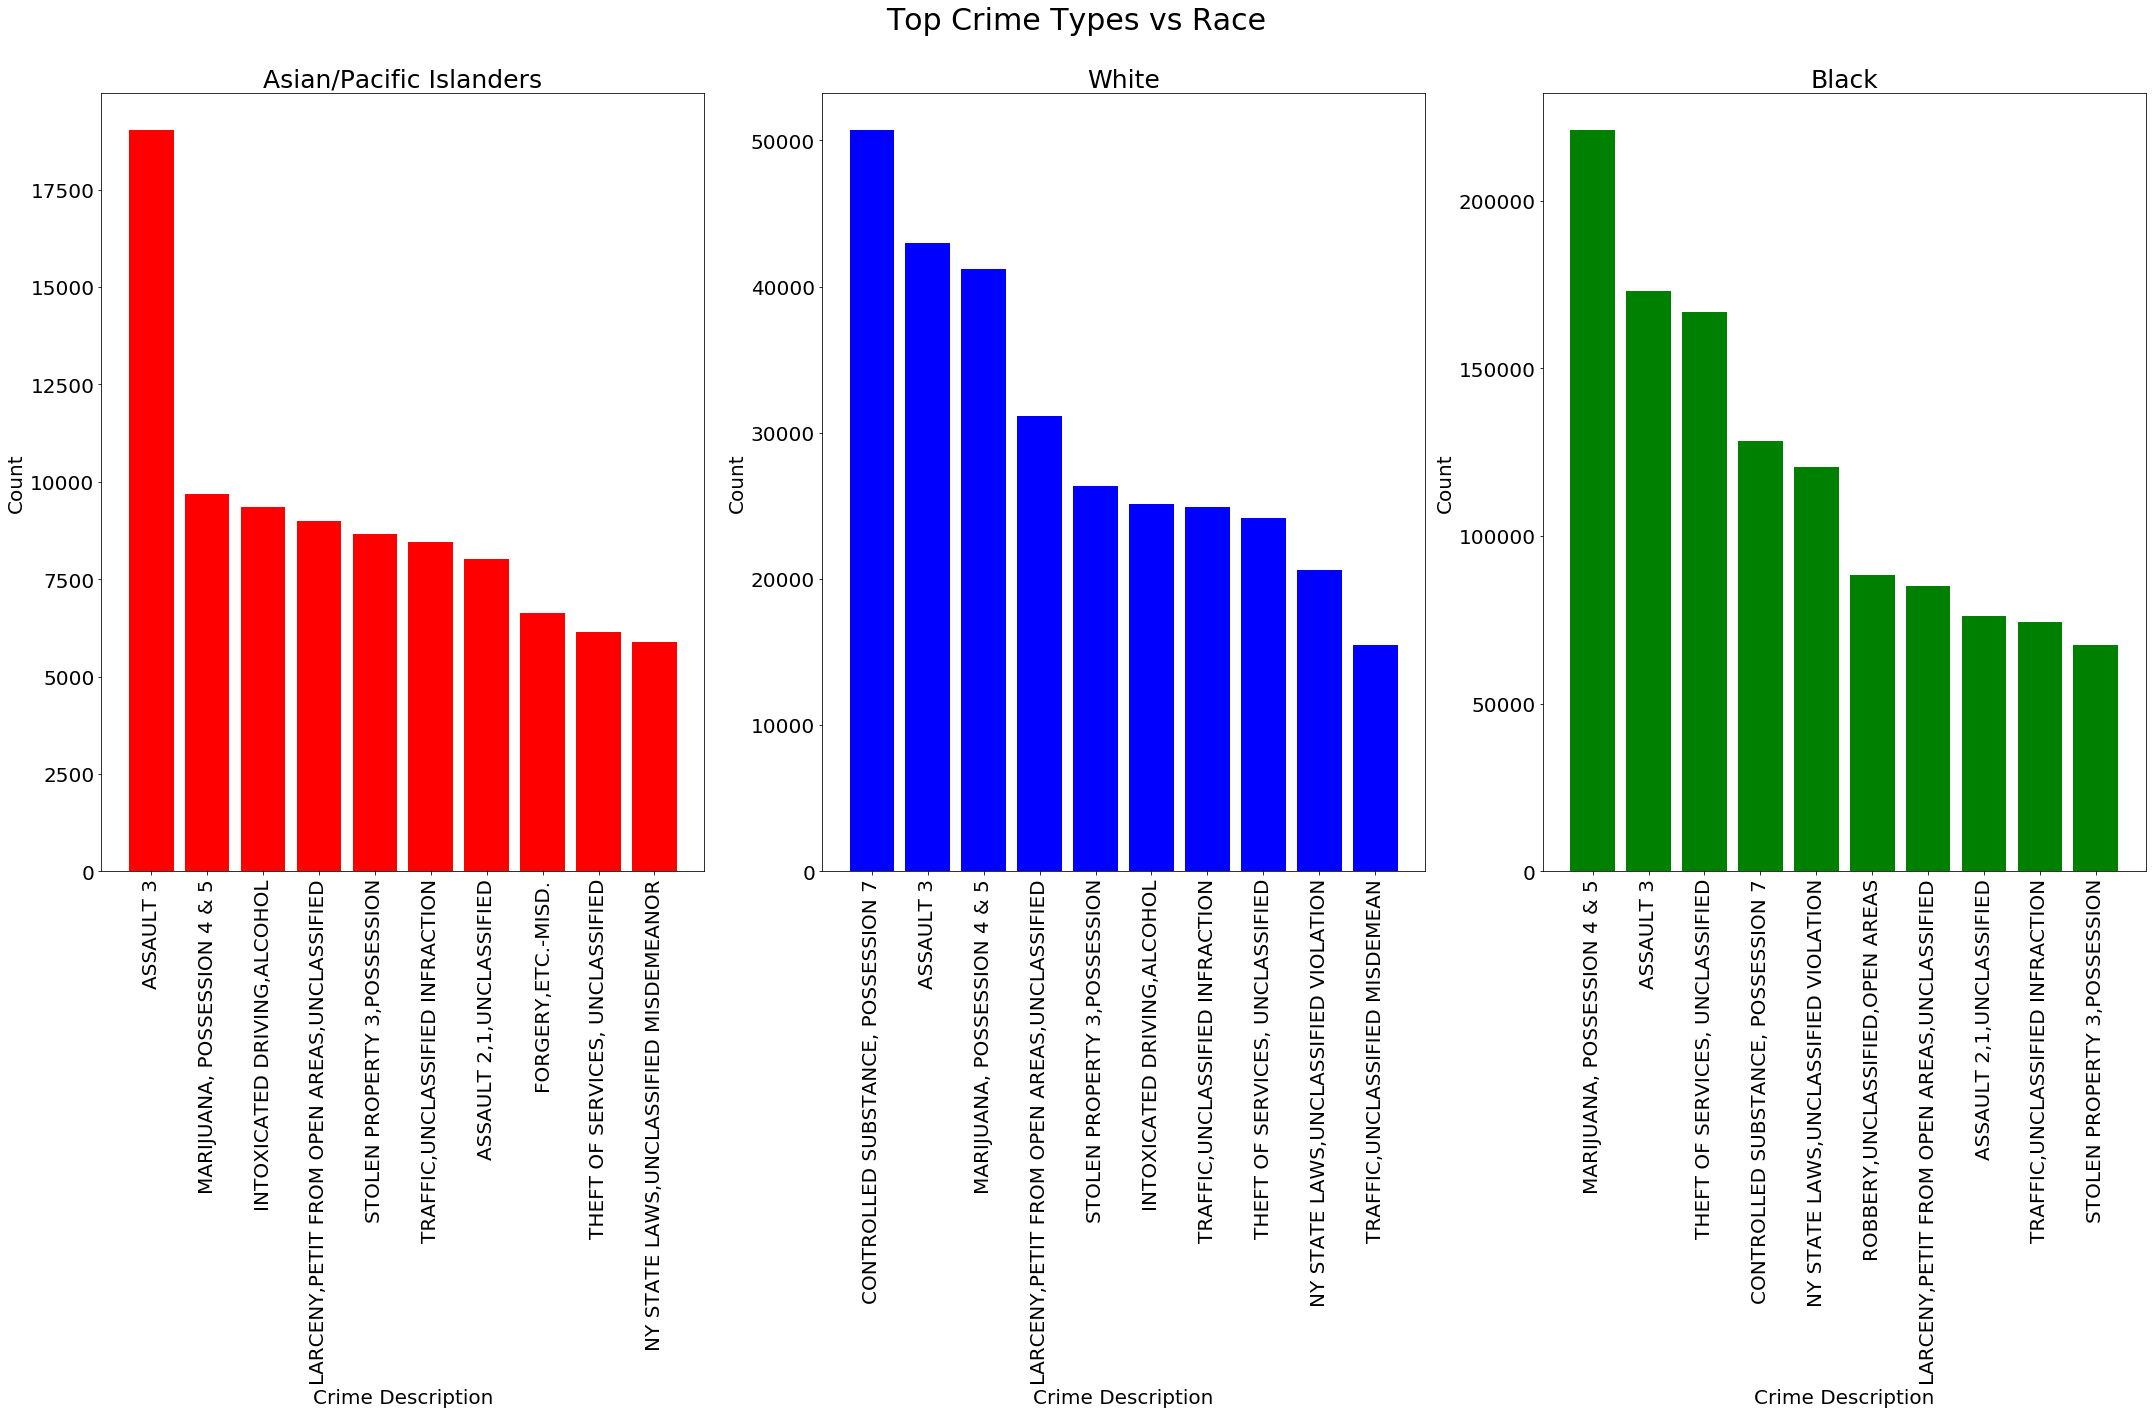

In [9]:
fig, ax = plt.subplots(figsize=(30, 20))
plt.suptitle("Top Crime Types vs Race", size=30)


plt.subplot(1,3,1)
plt.bar(df4['PD_DESC'][0:10],df4['Count'][0:10], color = 'red')
plt.title('Asian/Pacific Islanders', size =25)
plt.xlabel('Crime Description',size = 20)
plt.ylabel('Count',size = 20)
plt.xticks(size = 20, rotation='vertical')
plt.yticks(size = 20)

plt.subplot(1,3,2)
plt.bar(df6['PD_DESC'][0:10],df6['Count'][0:10],color = 'blue')
plt.title('White', size =25)
plt.xlabel('Crime Description',size = 20)
plt.ylabel('Count',size = 20)
plt.xticks(size = 20, rotation='vertical')
plt.yticks(size = 20)

plt.subplot(1,3,3)
plt.bar(df8['PD_DESC'][0:10],df8['Count'][0:10], color = 'green')
plt.title('Black', size =25)
plt.xlabel('Crime Description',size = 20)
plt.ylabel('Count',size = 20)
plt.xticks(size = 20, rotation='vertical')
plt.yticks(size = 20)

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()